<a href="https://colab.research.google.com/github/panos108/Training_ANN_with_Pytorch/blob/master/Example_of_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%rm -rf Training_ANN_with_Pytorch
!git clone https://github.com/panos108/Training_ANN_with_Pytorch.git

Cloning into 'Training_ANN_with_Pytorch'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 44 (delta 21), reused 35 (delta 14), pack-reused 0
Unpacking objects: 100% (44/44), done.


**Construct ANN**

You first need to initialize the neural network

In [2]:
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, state_size, action_size):
        super().__init__()
        self.layer1 = nn.Linear(state_size, 20)
        self.layer2 = nn.Linear(20, 20)
        self.layer3 = nn.Linear(20, 20)
        self.action = nn.Linear(20, action_size)

    def forward(self, state):
        m      = torch.nn.LeakyReLU(0.1)#0.01)
        layer1 = m(self.layer1(state))
        layer2 =m(self.layer2(layer1))
        layer3 = m(self.layer3(layer2))
        action = (self.action(layer3))
        return (action)


**Generate the input-output data**

In [3]:
import numpy as np
from Training_ANN_with_Pytorch.train_ann import *
x_m = 1000  # number of samples
x = np.random.default_rng().uniform(-5, 5, x_m)
y = np.random.default_rng().uniform(-5, 5, x_m)
X = np.array((x, y)).T

F = []
for i in range(0, x_m, 1):
    f = np.array([[100 * (y[i] - x[i] ** 2) ** 2 + (1 - x[i]) ** 2, x[i]*y[i]]])
    F.append(*f.reshape(1,2))
F = np.array(F)
if f.ndim==1:
    F = F.reshape(-1, 1)

**Initialize the neural network**

In [4]:
model = Model(X.shape[1],F.shape[1])

**Perform the training with all the default values of the class**

In [5]:
ANN = train_ann(model, X, F)
# You can have different options to choose from lise optimizer, objective function, to plot or print
#learning_rate = 0.01
#ANN =  train_ann(model, X, F, optimizer=optim.Adam(model.parameters(), lr=learning_rate), 
#                 loss_fn=nn.MSELoss(), learning_rate=learning_rate, print_val=False, plot=True, validation_set=0.33, auto_normalize=True, epoch=200,batch_size=68)

Epoch:  1  Batches:  1  Loss:  0.416103720664978
Epoch:  1  Batches:  2  Loss:  0.4040454626083374
Epoch:  1  Batches:  3  Loss:  0.37699222564697266
Epoch:  1  Batches:  4  Loss:  0.4322364926338196
Epoch:  1  Batches:  5  Loss:  0.39534804224967957
Epoch:  1  Batches:  6  Loss:  0.4183245003223419
Epoch:  1  Batches:  7  Loss:  0.37718892097473145
Epoch:  1  Batches:  8  Loss:  0.36238834261894226
Epoch:  1  Batches:  9  Loss:  0.36856362223625183
Epoch:  1  Batches:  10  Loss:  0.37168699502944946
Epoch:  2  Batches:  11  Loss:  0.33763259649276733
Epoch:  2  Batches:  12  Loss:  0.35152050852775574
Epoch:  2  Batches:  13  Loss:  0.3745080828666687
Epoch:  2  Batches:  14  Loss:  0.3496077060699463
Epoch:  2  Batches:  15  Loss:  0.34389528632164
Epoch:  2  Batches:  16  Loss:  0.3412947356700897
Epoch:  2  Batches:  17  Loss:  0.34951627254486084
Epoch:  2  Batches:  18  Loss:  0.3166021704673767
Epoch:  2  Batches:  19  Loss:  0.29571810364723206
Epoch:  2  Batches:  20  Loss:  0

**Perform Predictions of a given input (numpy)**


Text(0, 0.5, 'Predicitons')

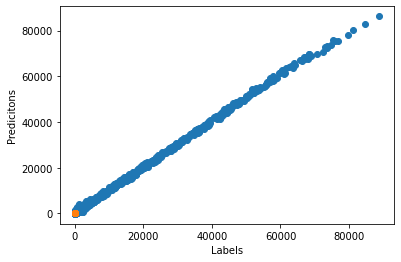

In [6]:

#This is how you make predicitons
fs = ANN.predict(X)

plt.plot(F,fs,'o')
plt.xlabel('Labels')
plt.ylabel('Predicitons')